In [1]:
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense # Import LSTM and Dense from keras.layers
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)
n_samples = 200
t = np.arange(n_samples)
time_series =  0.1 * np.sin(t) + 0.1 * np.random.randn(n_samples)


In [12]:
train_size= int(len(time_series)*.8)
train_data, test_data = time_series[:train_size], time_series[train_size:]

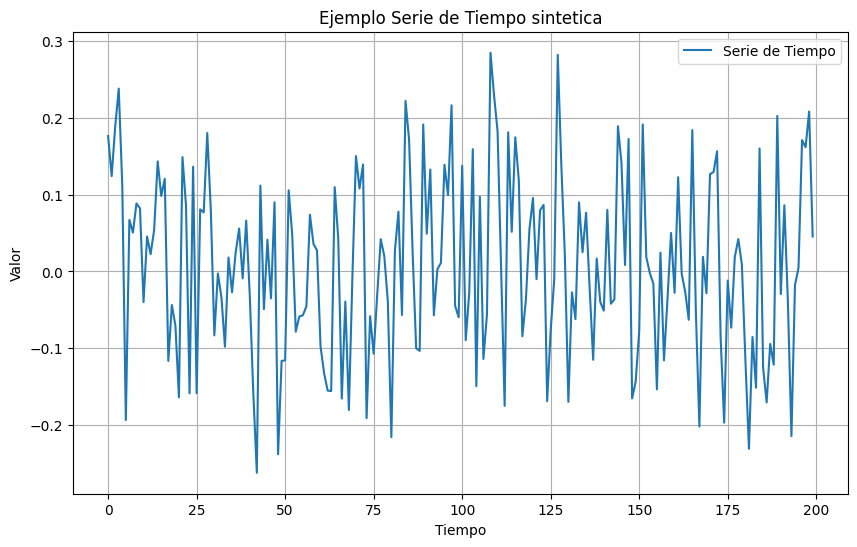

In [13]:
#Graficar serie de tiempo
plt.figure(figsize=(10,6))
plt.plot(t,time_series, label='Serie de Tiempo')
plt.title('Ejemplo Serie de Tiempo sintetica')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()


In [14]:
def create_dataset(data, seq_length):
  X, y = [], []
  for i in range(len(data) - seq_length):
    X.append(data[i:i+seq_length])
    y.append(data[i+seq_length])
  return np.array(X), np.array(y)

seq_length = 16 # Define seq_length before using it

X_train, y_train = create_dataset(train_data, seq_length)
X_test, y_test = create_dataset(test_data, seq_length)

In [27]:

model=Sequential()
model.add(LSTM(32, activation='relu', input_shape=(seq_length, 1), return_sequences=True)) # Set return_sequences to True
model.add(LSTM(16, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - loss: 0.0120 - val_loss: 0.0170
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0120 - val_loss: 0.0166
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0125 - val_loss: 0.0167
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0136 - val_loss: 0.0169
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0133 - val_loss: 0.0169
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0132 - val_loss: 0.0168
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0129 - val_loss: 0.0169
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0122 - val_loss: 0.0170
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0125 - val_loss: 0.0170
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0131 - val_loss: 0.0169
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0125 - val_loss: 0.0167
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0124 - val_l

In [35]:
Evaluacion= model.evaluate(X_test, y_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0180


In [37]:
del print
print("y_test: /n",y_test)
y_pred = model.predict(X_test)
print("y_pred: /n",y_pred)

y_test: /n [-0.07326574  0.018804    0.04220428  0.00882013 -0.11551465 -0.23114027
 -0.08543995 -0.15147227  0.16018158 -0.12554365 -0.17064073 -0.09450059
 -0.12150867  0.20263325 -0.02950576  0.08619594 -0.03942212 -0.21465501
 -0.01791097  0.00479083  0.17113206  0.161931    0.20836574  0.04547291]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
y_pred: /n [[ 0.007312  ]
 [ 0.01338503]
 [ 0.01185444]
 [ 0.00123837]
 [-0.01689581]
 [-0.02655287]
 [ 0.01920009]
 [ 0.03875349]
 [ 0.03821607]
 [ 0.02393144]
 [ 0.00744636]
 [ 0.00917735]
 [ 0.00622205]
 [ 0.0303798 ]
 [ 0.00287324]
 [-0.03736344]
 [-0.07113433]
 [-0.09630957]
 [-0.07832886]
 [-0.05141194]
 [-0.02319087]
 [-0.03385535]
 [-0.05815446]
 [-0.08053488]]


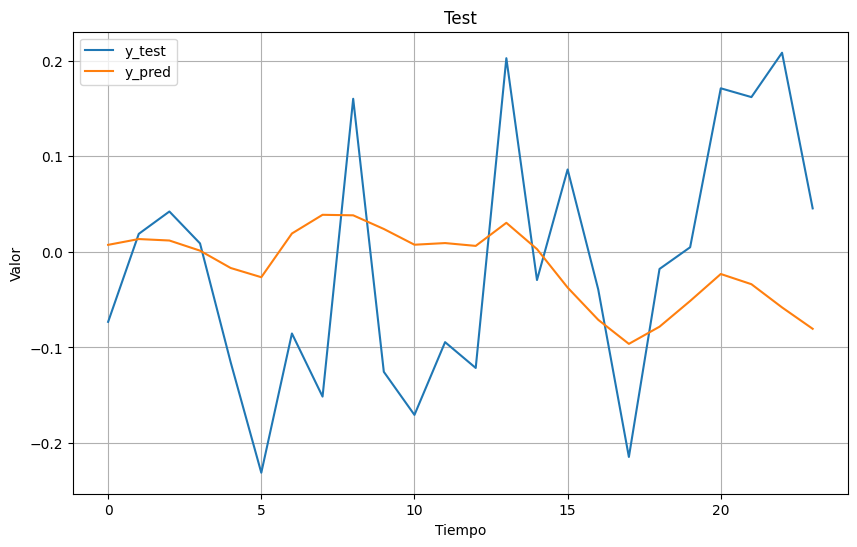

In [38]:
#graficar
plt.figure(figsize=(10,6))
plt.plot(y_test, label='y_test')
plt.plot(y_pred, label='y_pred')
plt.title('Test')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()